In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [278]:
sol = pd.read_excel('soldata_trainingset_clean.xls')
sol.drop(columns=['Unnamed: 8', 'Unnamed: 9'],inplace=True)

In [279]:
sol['Substance'] = sol['Substance'].str.strip()
sol['NAME'] = sol['Substance'].str.upper()

In [280]:
sol_res = sol[['Substance','S0 (mM)','SD of S0 (mM)']].copy()

In [281]:
sol_res.dropna(inplace=True)
sol_res['NAME'] =sol_res['Substance'].str.strip()

In [282]:
sol_res['NAME'] = sol_res['NAME'].str.upper()

In [283]:
sol_des = pd.read_excel('Solubility_training_descriptors_cleaned.xlsx')
sol_des.head()

,No.,NAME,MW,AMW,Sv,Mv,Me,Mp,Mi,nBM,...,Depressant-50,Psychotic-80,Hypertens-80,Hypertens-50,Hypnotic-80,Hypnotic-50,Neoplastic-80,Neoplastic-50,Infective-80,Infective-50
0,1,1-Naphthol ...,144.18,7.588,12.822,0.675,0.993,0.711,1.098,11,...,0,0,0,0,0,0,0,0,0,0
1,2,2_amino_5_bromo_benzoic_acid ...,216.04,12.708,12.057,0.709,1.037,0.738,1.118,7,...,0,0,0,0,0,0,0,0,1,0
2,3,4-Iodophenol ...,220.01,16.924,9.612,0.739,1.004,0.877,1.090,6,...,0,0,0,0,0,0,0,0,0,0
3,4,5_bromo_2_4_dihydroxybenzoic_acid ...,233.02,13.707,12.465,0.733,1.070,0.733,1.113,7,...,0,0,0,0,0,0,0,0,0,0
4,5,5_fluorouracil ...,130.09,10.841,8.383,0.699,1.105,0.635,1.181,3,...,0,0,0,0,0,0,0,0,0,0


In [284]:
sol_des['NAME'] = sol_des['NAME'].str.strip()
sol_des['NAME'] = sol_des['NAME'].str.upper()
sol_des['NAME'] = sol_des['NAME'].str.replace('-','_')

In [285]:
for name in sol_des['NAME'].tolist():
    if name not in sol_res['NAME'].tolist():
        print(name)

5_FLUOROURACIL
AMIODARONE
ASPIRIN
LEVOFLOXACIN
LOPERAMIDE
L_PROLINE
MECLIZINE
ORBIFLOXACIN
PEN G
PROCAINAMIDE
SERTRALINE


In [287]:
for name in sol_res['NAME'].tolist():
    if name not in sol_des['NAME'].tolist():
        print(name)

In [288]:
df_merged = sol_res.merge(sol_des, on='NAME',how='inner')
len(df_merged)
#df_merged.to_csv('sol_dragon_merged_lowdata.csv',index=False)

90

### EDA on DRAGON features: inner merge

In [2]:
df_merged = pd.read_csv('sol_dragon_merged_lowdata.csv')

In [3]:
len(df_merged)

90

In [4]:
df_merged.head()

,Substance,S0 (mM),SD of S0 (mM),NAME,No.,MW,AMW,Sv,Mv,Me,...,Depressant-50,Psychotic-80,Hypertens-80,Hypertens-50,Hypnotic-80,Hypnotic-50,Neoplastic-80,Neoplastic-50,Infective-80,Infective-50
0,1_naphthol,10432.300,408.616,1_NAPHTHOL,1,144.18,7.588,12.822,0.675,0.993,...,0,0,0,0,0,0,0,0,0,0
1,2_amino_5_bromo_benzoic_acid,842.692,14.6303,2_AMINO_5_BROMO_BENZOIC_ACID,2,216.04,12.708,12.057,0.709,1.037,...,0,0,0,0,0,0,0,0,1,0
2,4_iodophenol,19312.000,604.678,4_IODOPHENOL,3,220.01,16.924,9.612,0.739,1.004,...,0,0,0,0,0,0,0,0,0,0
3,5_bromo_2_4_dihydroxybenzoic_acid,2397.220,40.1944,5_BROMO_2_4_DIHYDROXYBENZOIC_ACID,4,233.02,13.707,12.465,0.733,1.070,...,0,0,0,0,0,0,0,0,0,0
4,acetaminophen,86329.600,7016.34,ACETAMINOPHEN,6,151.18,7.559,12.558,0.628,1.015,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_merged_fet = df_merged.drop(columns=['Substance','S0 (mM)', 'SD of S0 (mM)', 'NAME','No.'])
df_corr = df_merged_fet.corr().abs()

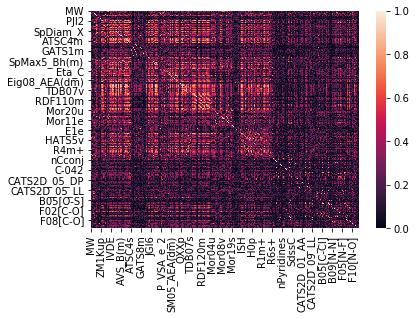

In [8]:
sns.heatmap(df_corr)

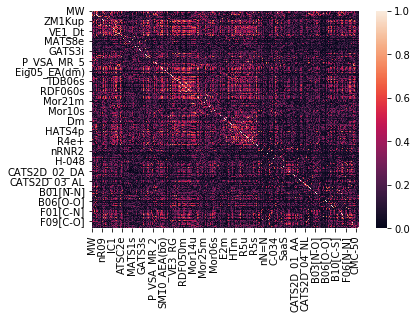

In [10]:
"""
Remove columns with correlation larger than 0.9. Note that the 'to_drop' columns were selected based
on the correlations with the data in replicate 1.
"""
upper = df_corr.where(np.triu(np.ones(df_corr.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
df_merged_fet.drop(labels=to_drop, axis=1,inplace=True)

"""View the new correlation matrix"""

corr_matrix = df_merged_fet.corr().abs()
sns.heatmap(corr_matrix)

In [11]:
df_merged_fet.columns

Index(['MW', 'AMW', 'Mv', 'Me', 'Mp', 'Mi', 'nBM', 'RBN', 'RBF', 'nDB',
       ...
       'Depressant-50', 'Psychotic-80', 'Hypertens-80', 'Hypertens-50',
       'Hypnotic-80', 'Hypnotic-50', 'Neoplastic-80', 'Neoplastic-50',
       'Infective-80', 'Infective-50'],
      dtype='object', length=1002)

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
features = np.array(df_merged_fet)
res = pca.fit_transform(features)

In [13]:
df_merged['pca_1'] = res[:,0]
df_merged['pca_2'] = res[:,1]

In [14]:
df_merged['log_sol'] = np.log(df_merged['S0 (mM)'])

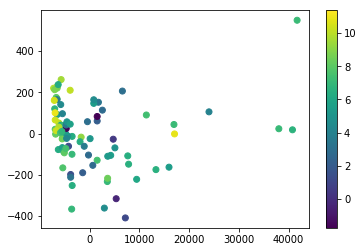

In [15]:
plt.scatter(df_merged['pca_1'], df_merged['pca_2'], c=df_merged['log_sol'])
plt.colorbar()

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
def fit_rf_cv(X, y, seed):
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25,random_state=seed)
    params = [{'n_estimators':[100]}]
    rf = RandomForestRegressor(criterion = 'mse',random_state=seed)
    forest = GridSearchCV(rf, params, cv=3,scoring='neg_mean_squared_error')
    forest.fit(X_train, y_train)
    #scores = cross_val_score(classifier, X_train, y_train)
    y_pred = forest.predict(X_test)
    return forest,X_train, y_train, X_test, y_test,y_pred,forest.best_score_ ,forest.best_estimator_   

In [75]:
features = np.array(df_merged_fet)
labels = df_merged['log_sol']

In [88]:
res = []
for seed in [0,99,110,150,42]:
    forest,X_train, y_train, X_test,y_test,y_pred,forest.best_score_ ,forest.best_estimator_  = fit_rf_cv(features, labels, seed)
    re = (forest,X_train, y_train, X_test,y_test,y_pred,forest.best_score_ ,forest.best_estimator_)
    res.append(re)

In [89]:
for re in res:
    print(np.sqrt(abs(re[6])))

2.0732820118854023
2.1468736007630738
2.228931659696544
2.1231414868439993
2.0210796089654157


In [91]:
for re in res:
    y_test, y_pred = re[4], re[5]
    err = np.sqrt(np.mean(np.square(y_test-y_pred)))
    print(err)

1.9260282691407933
1.7747153568637148
1.1977895357478252
2.0956086109332204
2.773889693086304


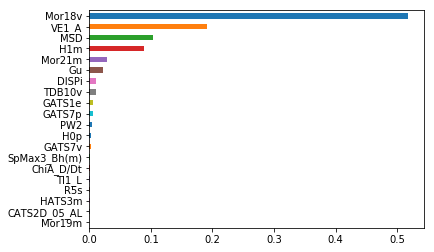

In [126]:
estimators = [re[-1] for re in res]
f_importances = pd.Series(estimator[4].feature_importances_, index=df_merged_fet.columns)
f_importances.nlargest(20).plot(kind='barh')
plt.gca().invert_yaxis()
#f_importances.nlargest(100).index.tolist()


In [127]:
features = []
for estimator in estimators:
    f_importances = pd.Series(estimator.feature_importances_, index=df_merged_fet.columns)
    tmp_lst = f_importances.nlargest(20).index.tolist()
    features.extend(tmp_lst)   

In [129]:
features_unique = list(set(features))
len(features_unique)

54

In [134]:
df_merged_cp = df_merged[['Substance','S0 (mM)', 'SD of S0 (mM)']+features_unique].copy()

In [138]:
df_merged_cp.to_csv('Solubility_train_descriptors_reduced.csv',index=False)